In [35]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [36]:
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

In [37]:
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    return features.flatten()

In [39]:
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    return features.flatten()

In [40]:
def compare_images(directory):
    features_dict = {}
    similar_pairs = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        features = extract_features(img_path, model)
        features_dict[img_name] = features

    for name1, features1 in features_dict.items():
        for name2, features2 in features_dict.items():
            if name1 != name2:
                # Higher is more similar
                sim = 1 - distance.cosine(features1, features2)  
                # Threshold for considering images to be similar
                if sim > 0.92:  
                    pair = sorted([name1, name2])
                    if pair not in similar_pairs:
                        similar_pairs.append(pair)

    return similar_pairs


In [41]:
def display_similar_images(similar_pairs, directory):
    for pair in similar_pairs:
        fig, axs = plt.subplots(1, 2)
        img1 = image.load_img(os.path.join(directory, pair[0]))
        img2 = image.load_img(os.path.join(directory, pair[1]))
        axs[0].imshow(img1)
        axs[0].axis('off')
        axs[0].set_title('Image 1')
        axs[1].imshow(img2)
        axs[1].axis('off')
        axs[1].set_title('Image 2')
        plt.show()


1/1 [==============================] - 0s 392ms/step


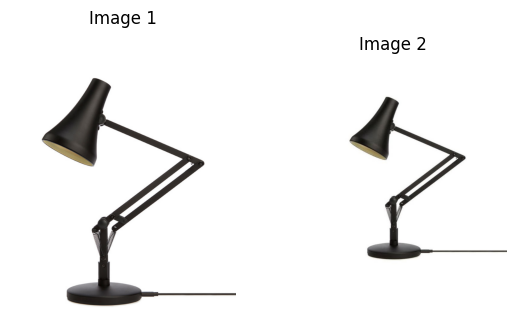

In [42]:
directory = 'C:\\Users\\KB\\OneDrive\\Desktop\\lamp\\data'
similar_pairs = compare_images(directory)
display_similar_images(similar_pairs, directory)